<a href="https://colab.research.google.com/github/M7mdNassar/Mobile-Price-Classification/blob/main/Mobile_Price_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Mobile Price Classification



# Mobiles Prices Prediction

In [48]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
font = {'size'   : 14}
plt.rc('font', **font)
warnings.filterwarnings("ignore")

## **Load dataset**


In [49]:
# Import Dataset
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
x = data.iloc[:,0:20]
y = data.iloc[:,20]
pd.set_option('display.max_columns', None)


In [50]:
#Inspecting the training Dataset
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [51]:
#Inspecting the Test Dataset
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


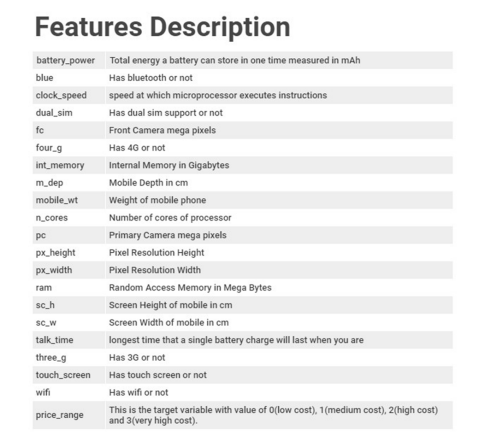

#Data Preprocessing

In [53]:
#Checking the missing values in our dataset if any
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [54]:
#Display information about our dataset
print("------------>Information about the Dataset<------------")
print()
data.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  


In [55]:
#Summary statistics of the training dataset
descrip=data.describe()
#Summary statistics of the test dataset
descrip_test=test_data.describe()
print("------------>Decription of the Training Data<------------")
print()
pd.DataFrame(data = descrip)

------------>Decription of the Training Data<------------



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [56]:
print("------------>Decription of the Testing Data<------------")
print()
pd.DataFrame(data = descrip_test)

------------>Decription of the Testing Data<------------



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


Text(0.5, 1.0, 'Correlation of Attirubtues')

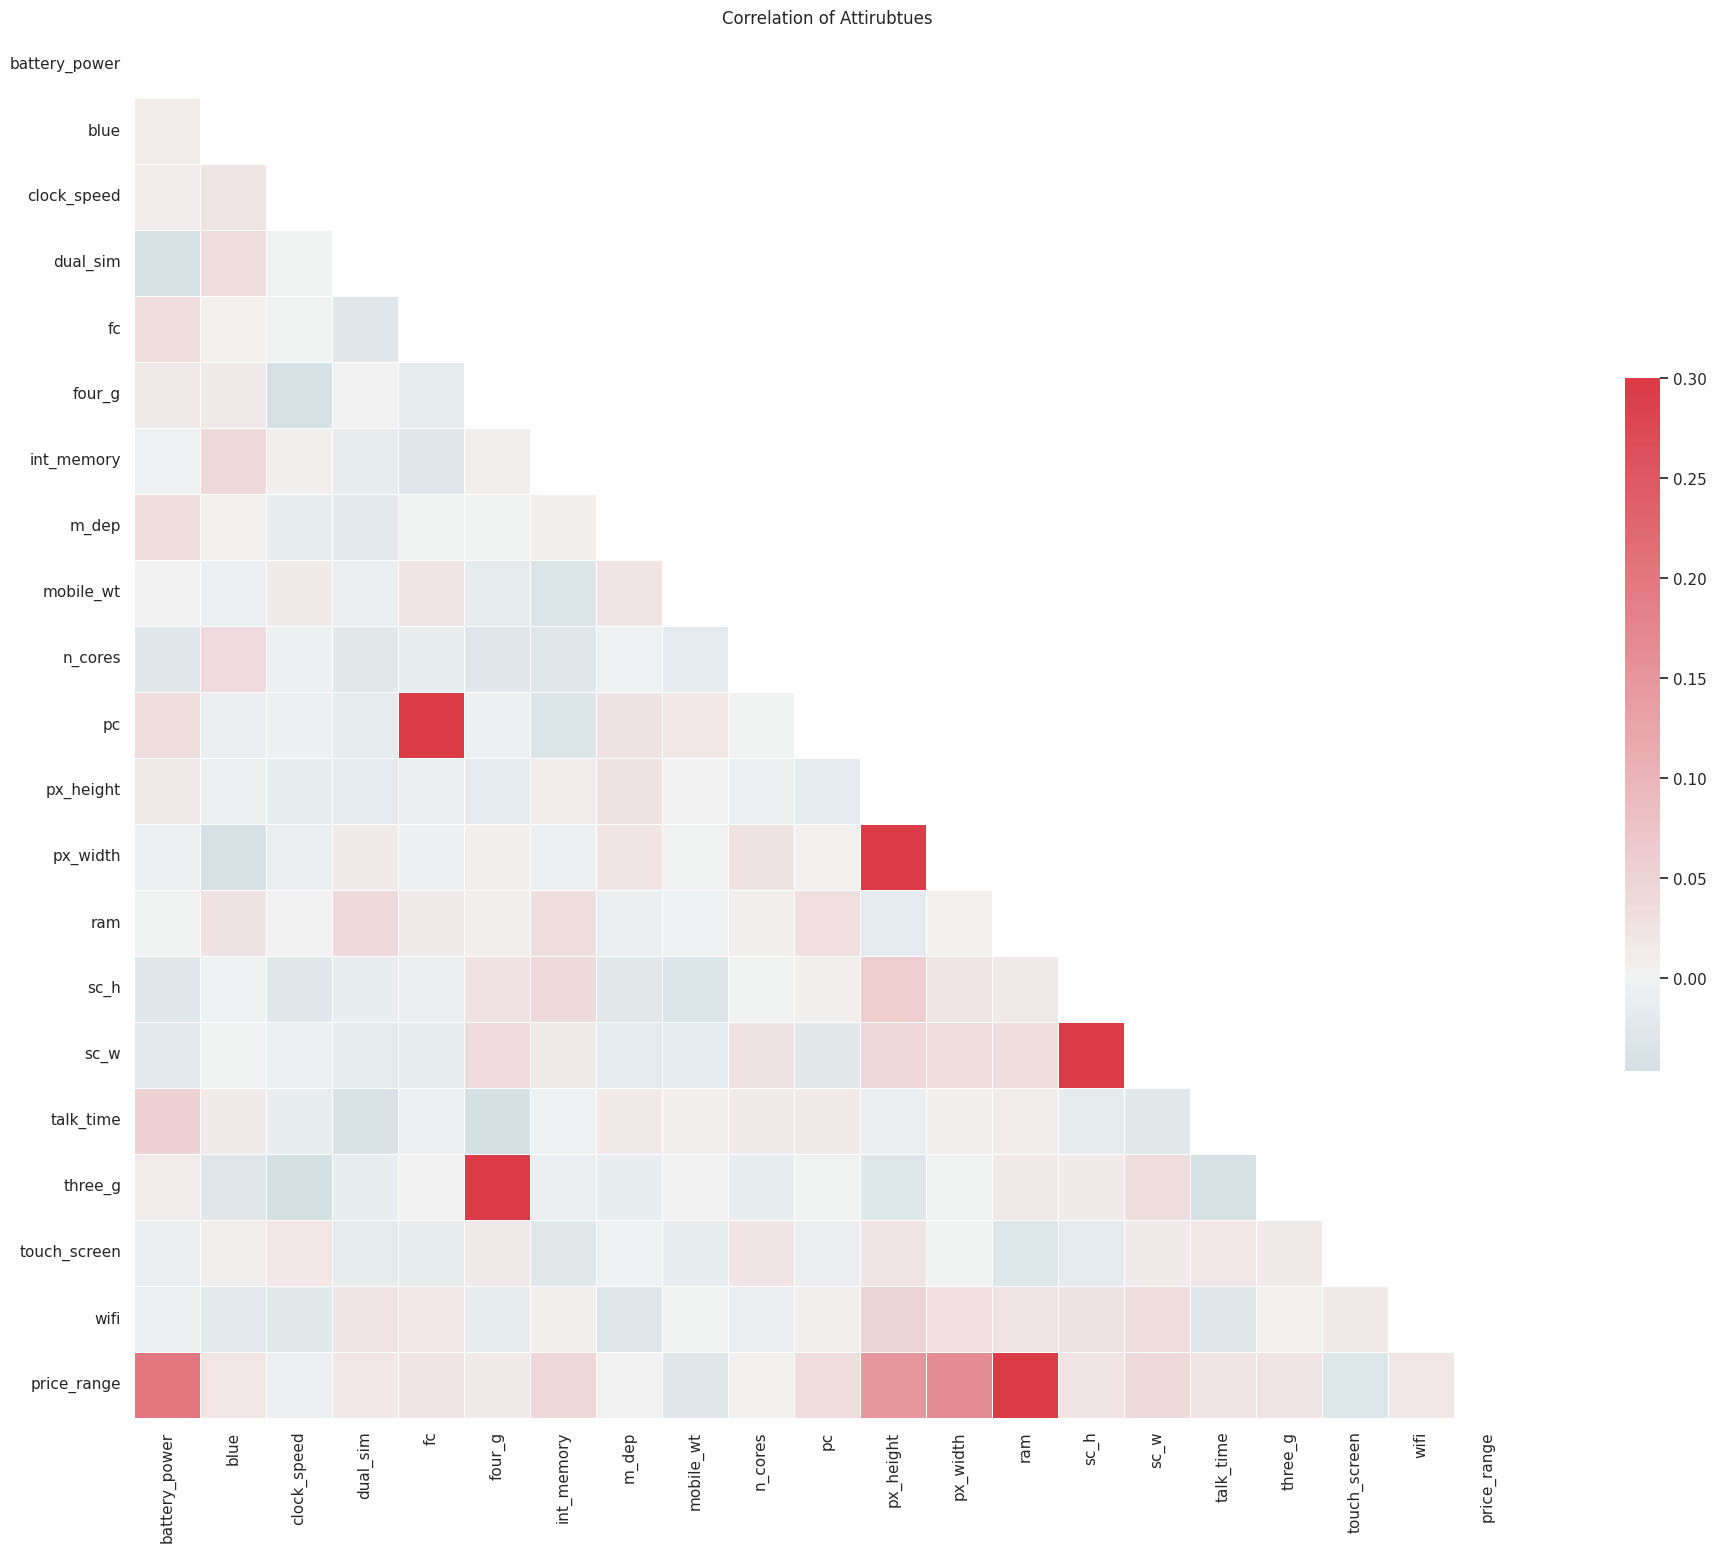

In [57]:
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues")

#High positive correlation observed between:

"pc" and "fc" (primary camera mega pixels and front camera mega pixels)

---

"three_g" and "four_g" (3G network support and 4G network support)

---

"px_width" and "px_height" (pixel resolution width and pixel resolution height)


---




------------>Outlier Analysis of Non-Categorical Data<------------



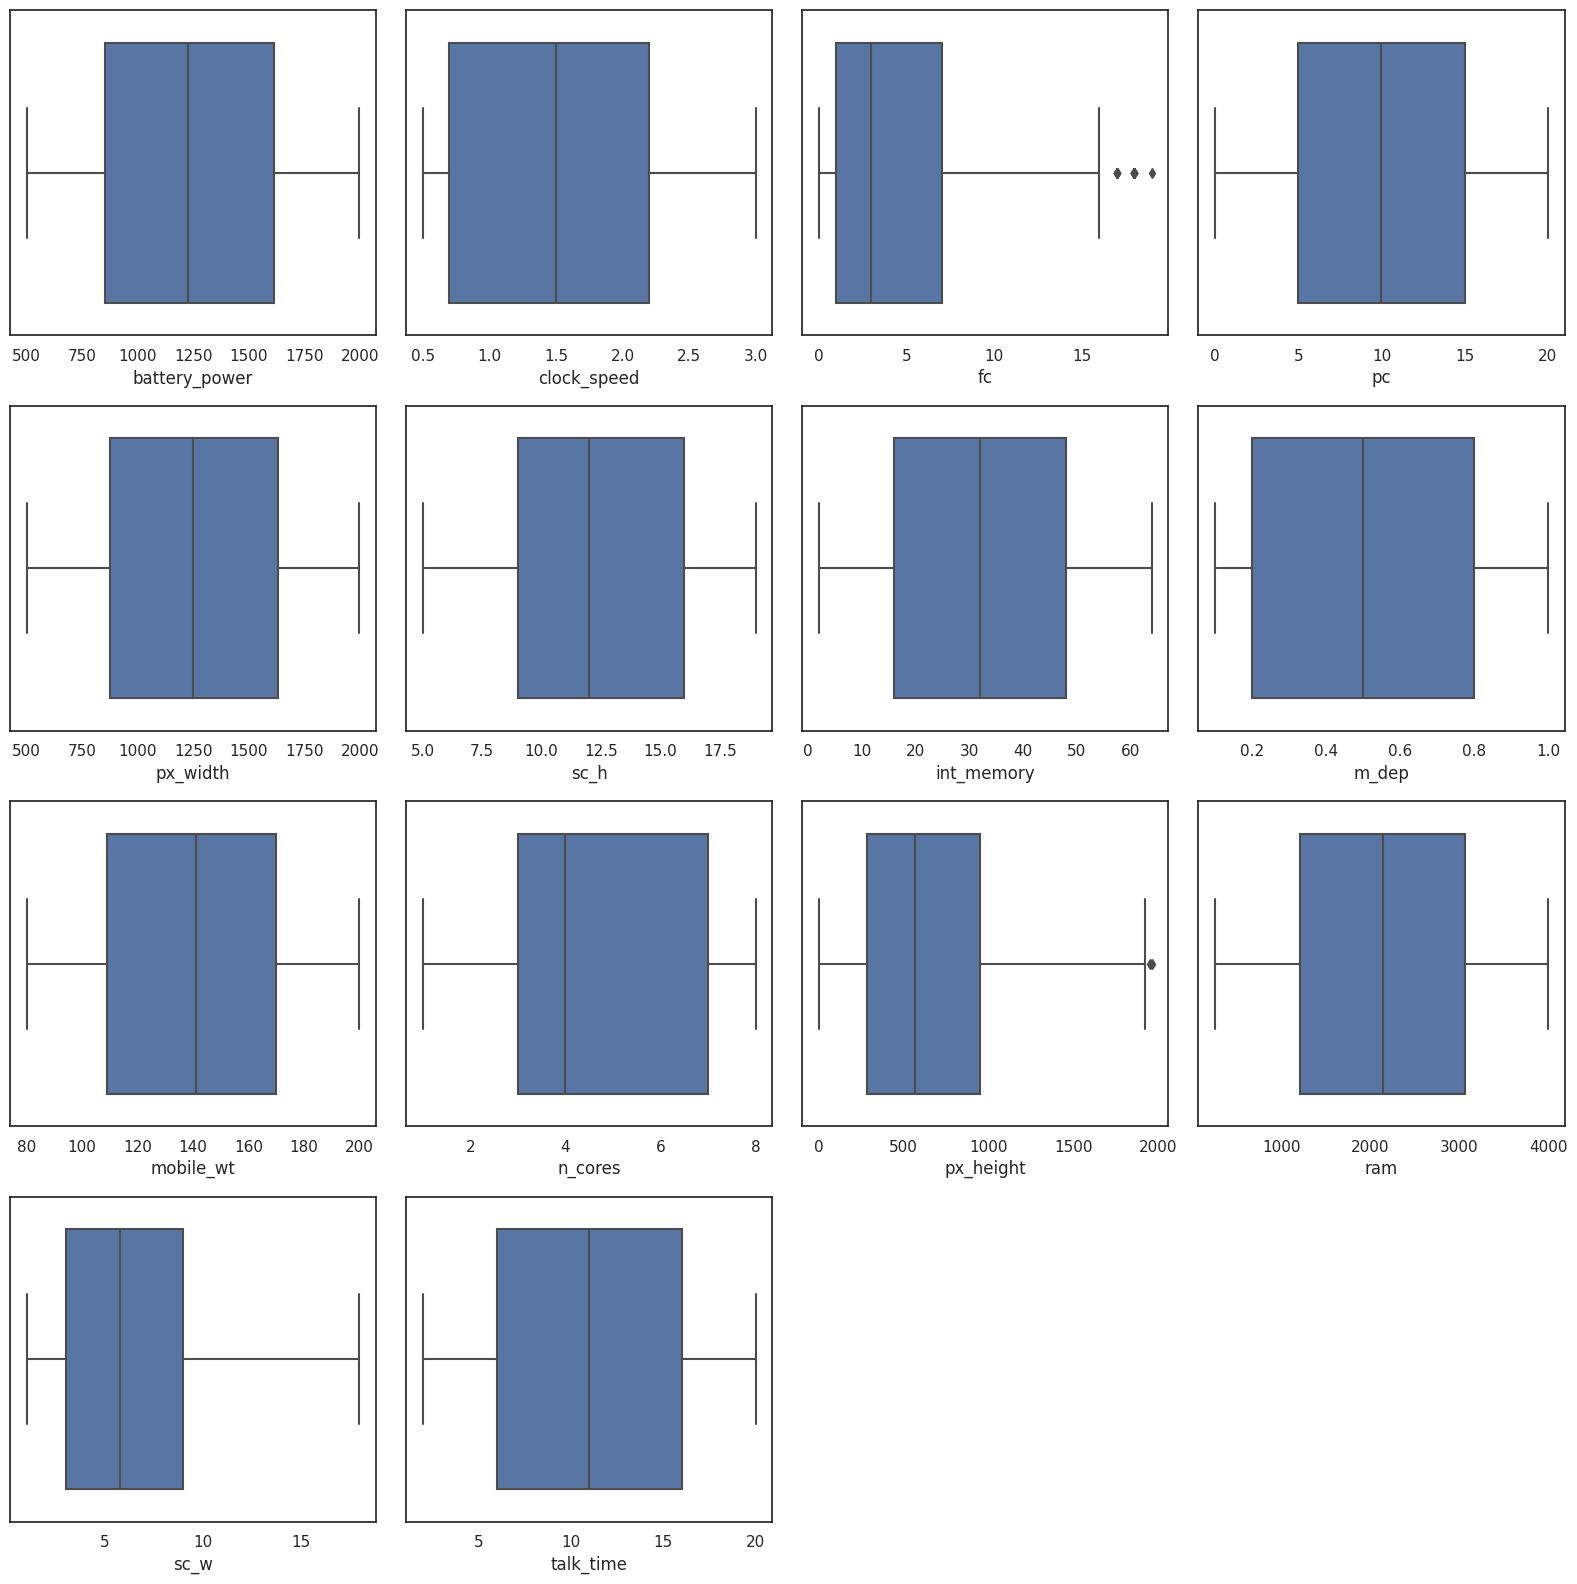

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

sns.boxplot(x=dataset['battery_power'], ax=ax[0, 0])
sns.boxplot(x=dataset['clock_speed'], ax=ax[0, 1])
sns.boxplot(x=dataset['fc'], ax=ax[0, 2])
sns.boxplot(x=dataset['pc'], ax=ax[0, 3])
sns.boxplot(x=dataset['px_width'], ax=ax[1, 0])
sns.boxplot(x=dataset['sc_h'], ax=ax[1, 1])
sns.boxplot(x=dataset['int_memory'], ax=ax[1, 2])
sns.boxplot(x=dataset['m_dep'], ax=ax[1, 3])
sns.boxplot(x=dataset['mobile_wt'], ax=ax[2, 0])
sns.boxplot(x=dataset['n_cores'], ax=ax[2, 1])
sns.boxplot(x=dataset['px_height'], ax=ax[2, 2])
sns.boxplot(x=dataset['ram'], ax=ax[2, 3])
sns.boxplot(x=dataset['sc_w'], ax=ax[3, 0])
sns.boxplot(x=dataset['talk_time'], ax=ax[3, 1])

# Remove empty subplots
fig.delaxes(ax[3, 2])
fig.delaxes(ax[3, 3])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



##* There are a few outliers in fc and px_height only.


Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

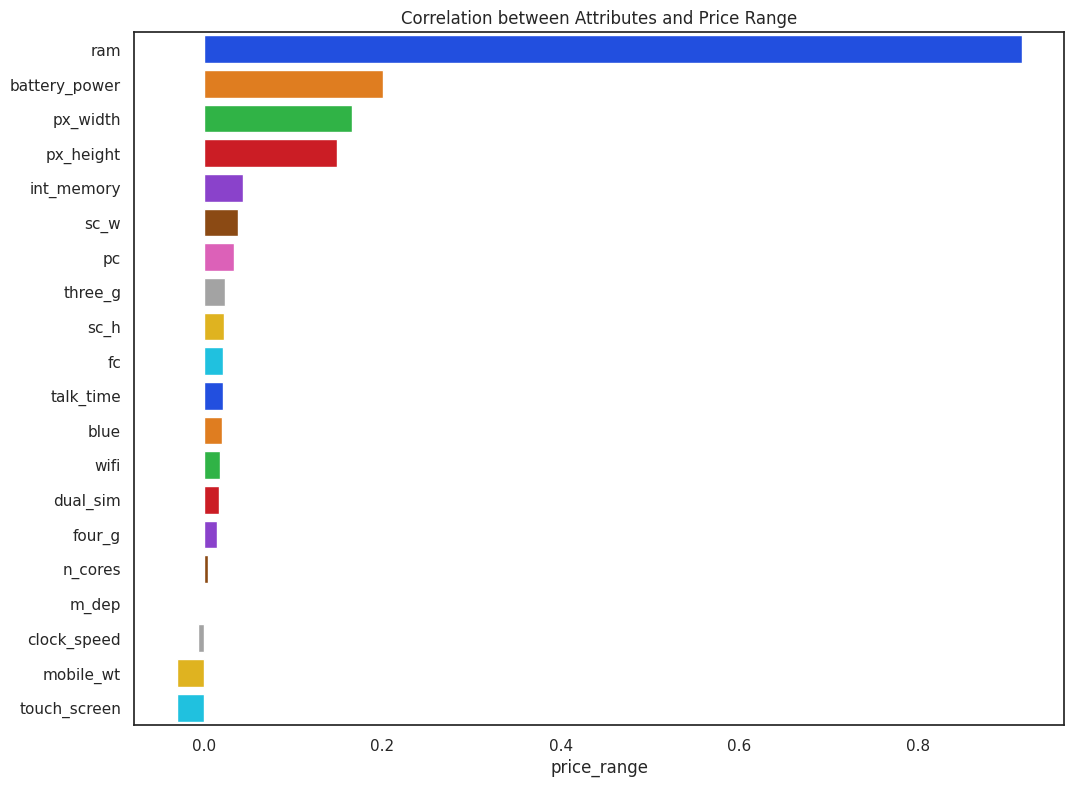

In [59]:
#we are not considering the correlations between X features among themselves
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



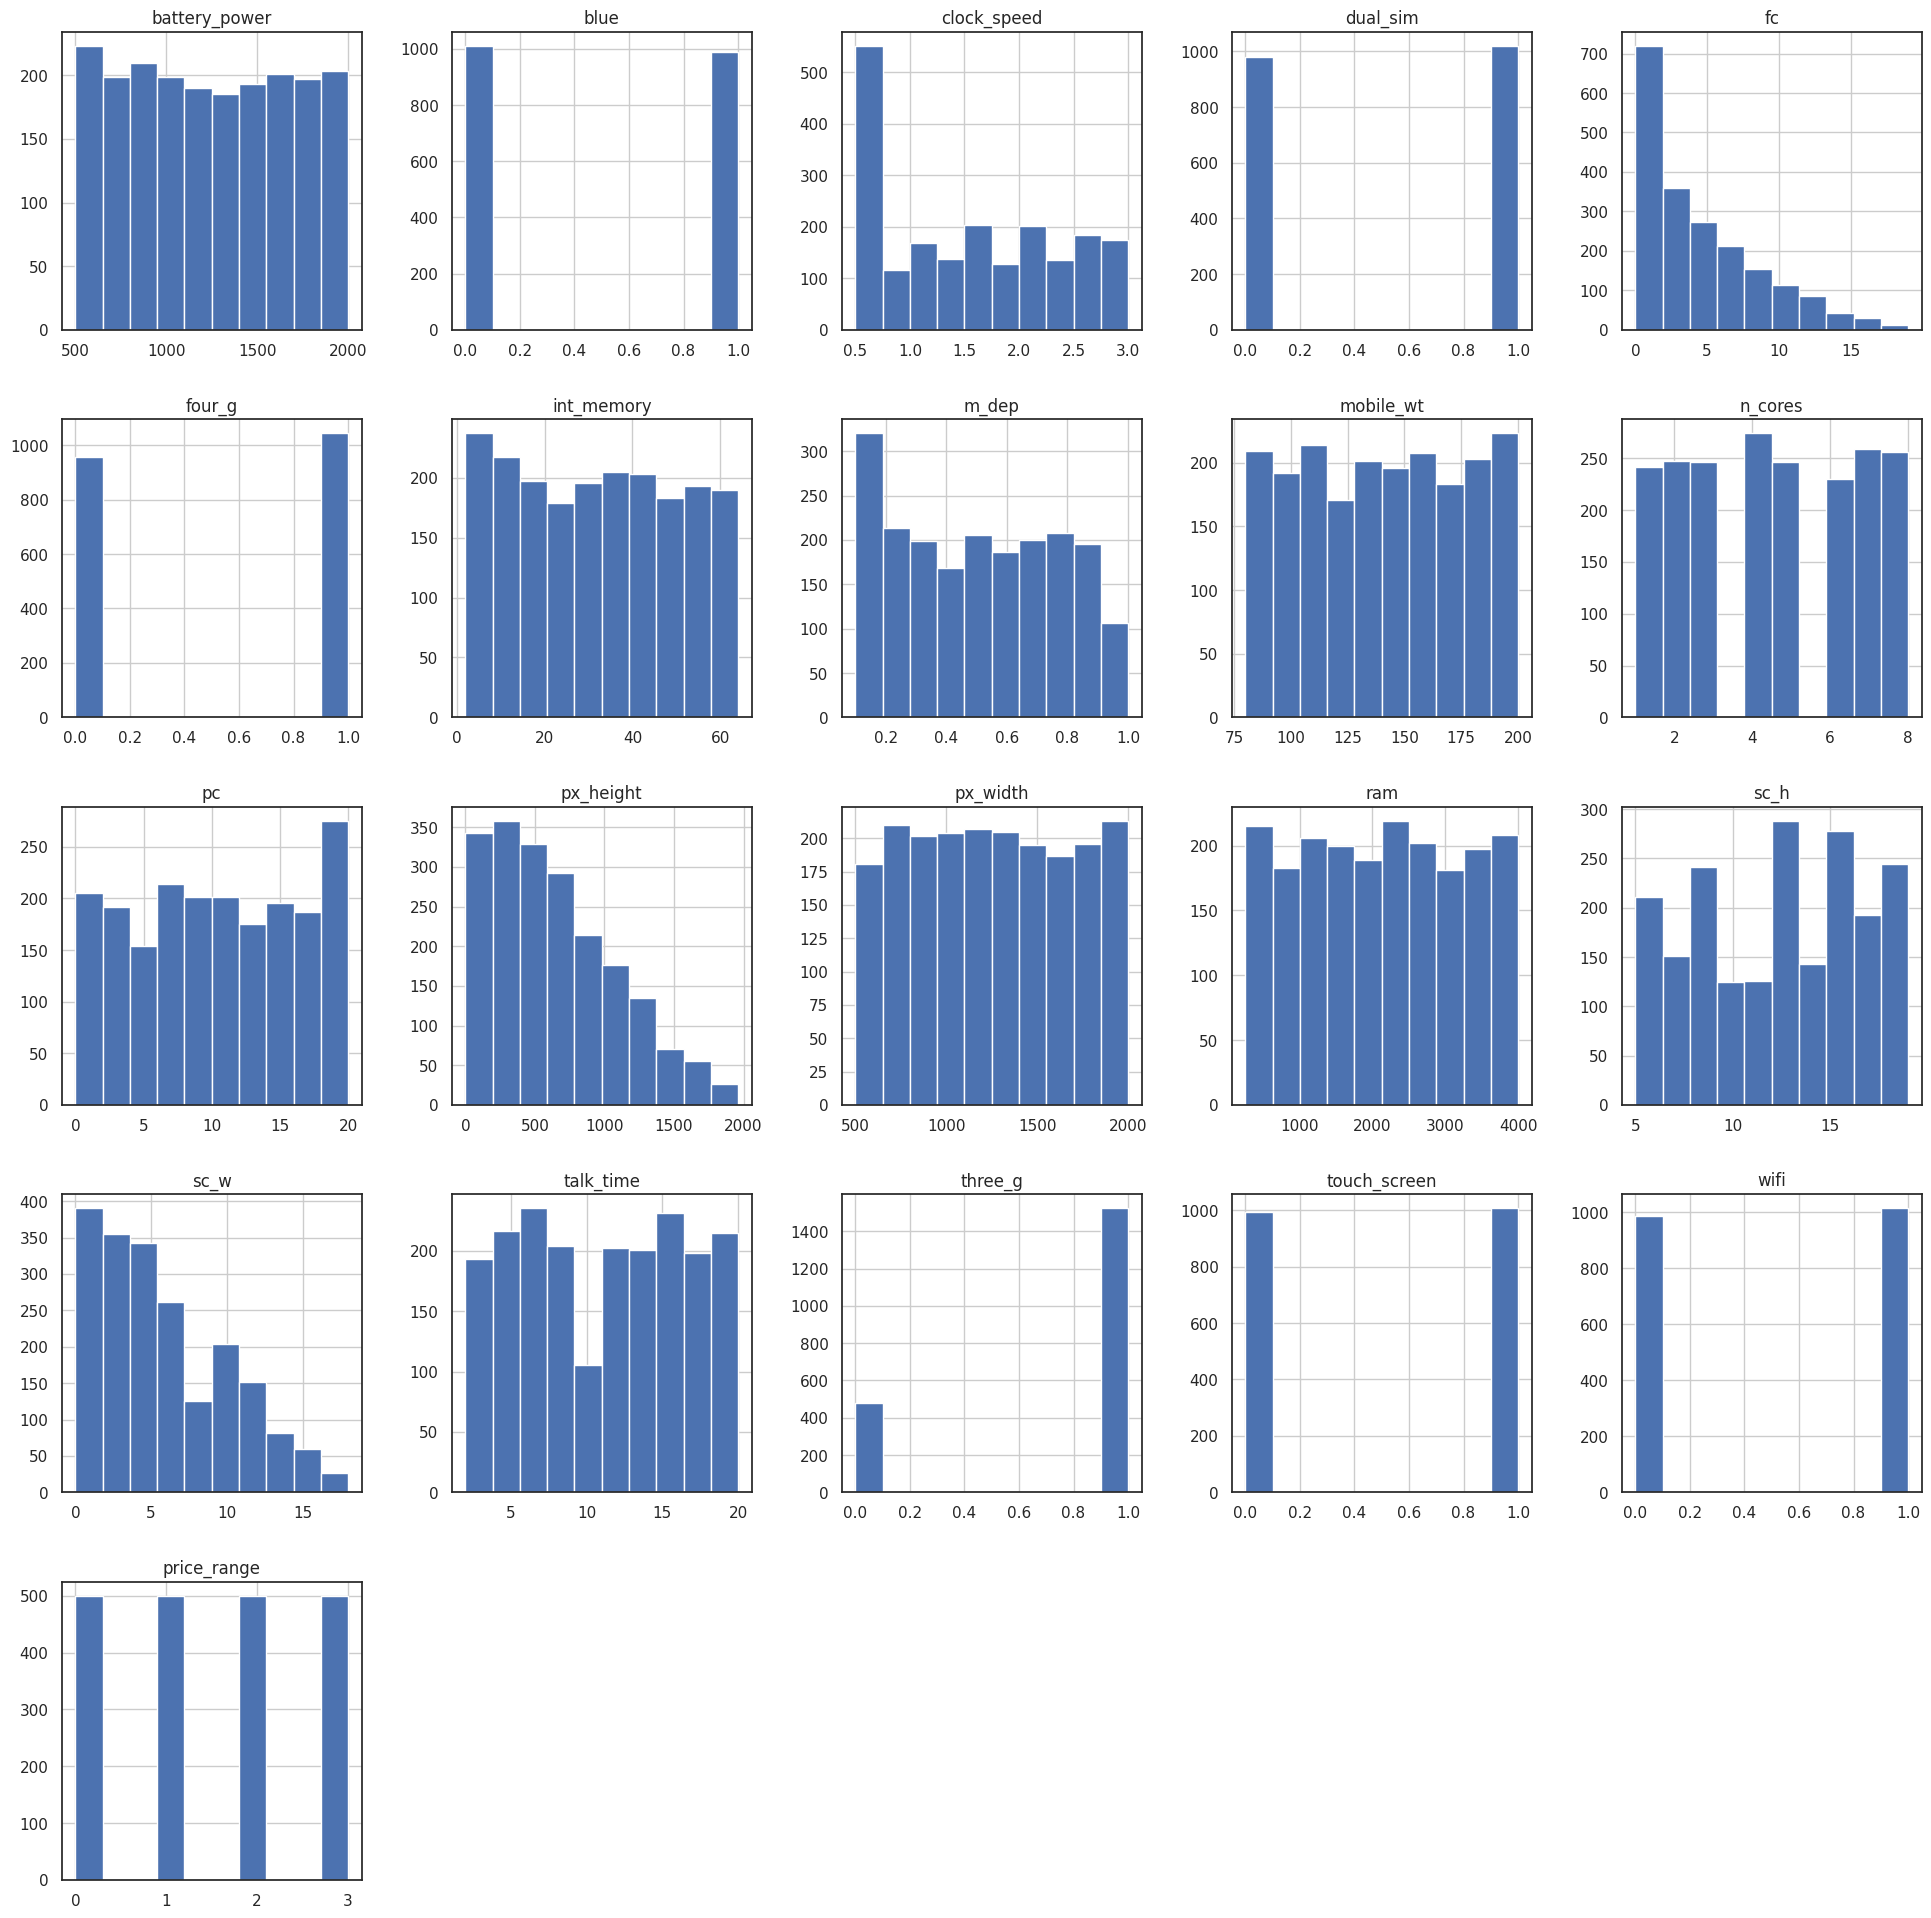

In [60]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------")
print()
data.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

# Data Splitting

In [61]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
# Splitting of data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify = y)

In [62]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = data.iloc[:,:20].columns
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

# remove outliers

In [ ]:
# import numpy as np

# def remove_outliers(data, threshold=1.5):
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     iqr = q3 - q1
#     lower_bound = q1 - threshold * iqr
#     upper_bound = q3 + threshold * iqr
#     return data[(data >= lower_bound) & (data <= upper_bound)]

# # Apply outlier removal to X_train and x_test

# X_train = remove_outliers(x_train)
# X_test = remove_outliers(x_test)
# print(x_train)

[-1.22448198 -0.98634324  0.86456478 ...  0.57253893 -1.00752834
  0.98265048]


#Implementation of Machine Learning Alogorithms:
We will apply different algorithms on the training and validation datasets to predict the mobile phone price. Then, we will select the best model based on the performance evaluation. Finally, we will utilize the chosen model to generate target values for the test dataset.


# Random Forest

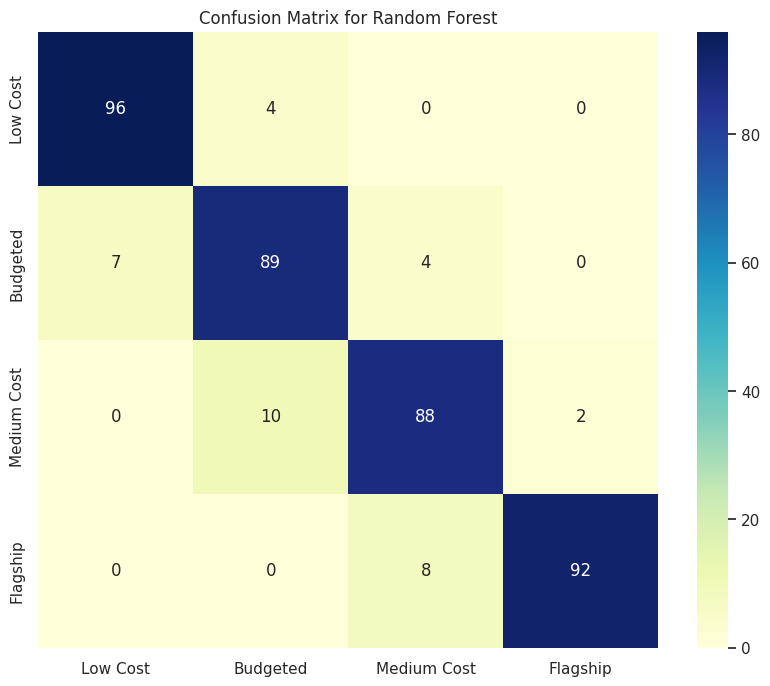

Text(0.5, 1.0, 'Visualizing Important Features for Random Forest')

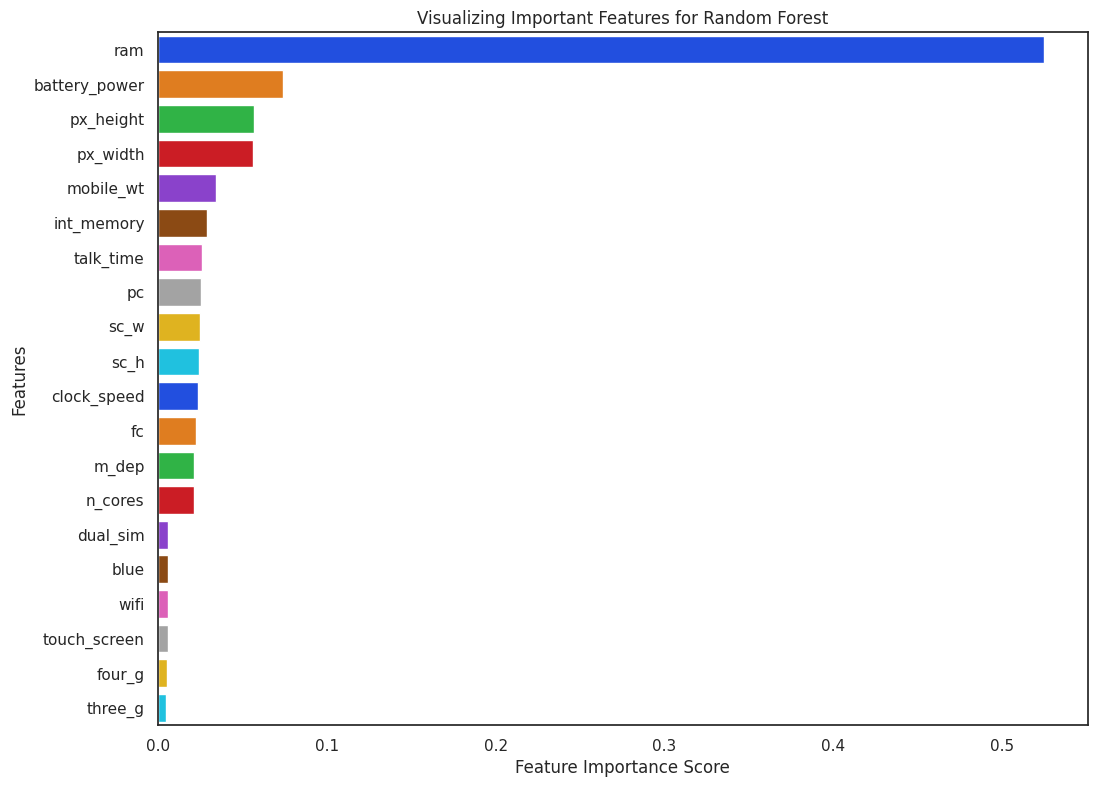

In [63]:
# ------------->RANDOM FOREST<------------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_rf)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Random Forest")
plt.show()
#Calculate Accuracy
acc_rf = accuracy_score(y_valid, y_pred_rf)
#Features Contribution
feature_imp = pd.Series(rf.feature_importances_,index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Random Forest")

# SVM

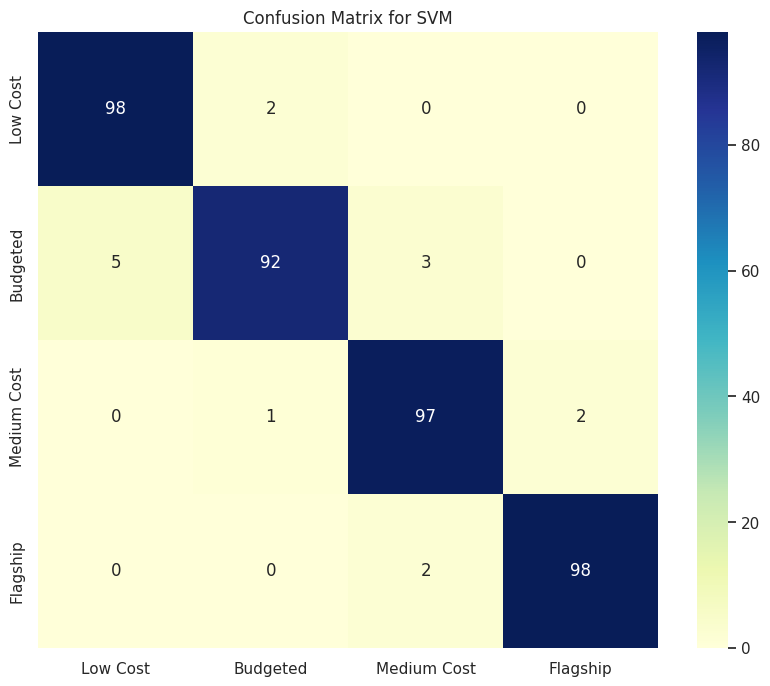

Text(0.5, 1.0, 'Visualizing Important Features for SVM')

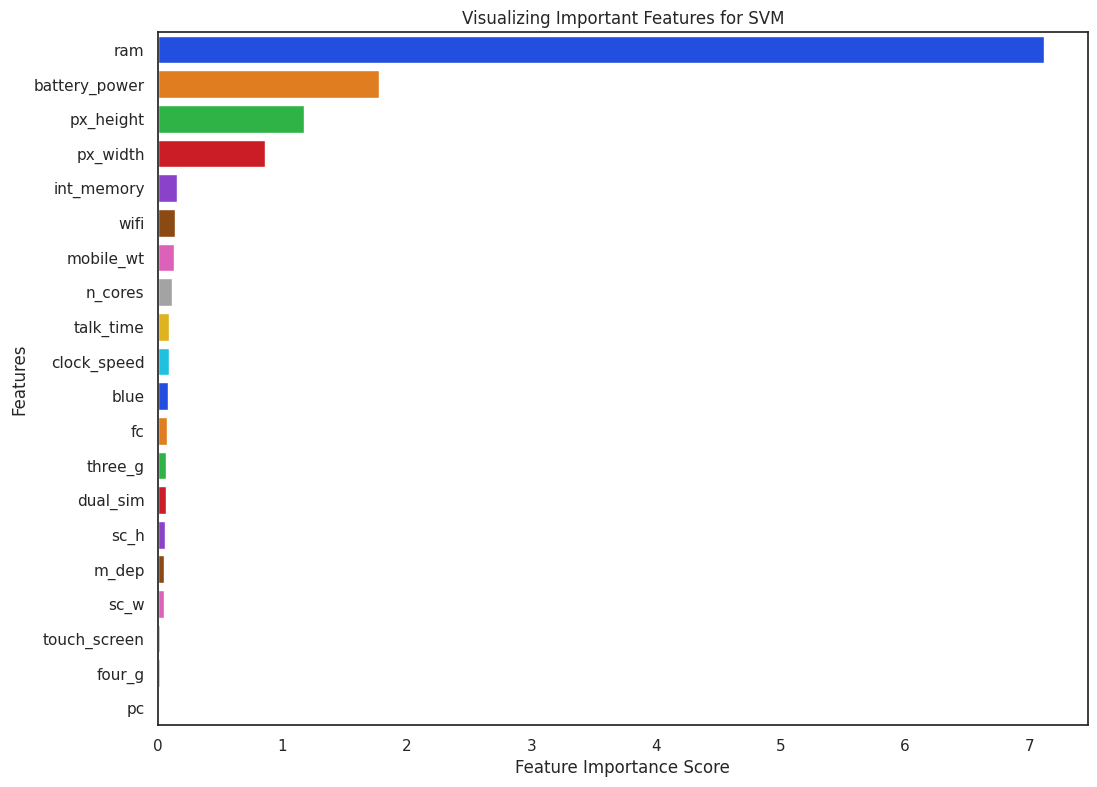

In [64]:
#------------->SVM<-------------
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',random_state = 0)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_svm)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for SVM")
plt.show()
#Calculate Accuracy
acc_svm = accuracy_score(y_valid, y_pred_svm)
#Features Contribution
feature_imp = pd.Series(abs(svm.coef_[0]), index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for SVM")

In [65]:
#------------>Accuracy Comparison<------------
models = ['RF','SVM']
acc_scores = [acc_rf , acc_svm]
print("Models\tAccuracy\n")
for i in range(2):
    print(str(models[i]) + "\t" + str(acc_scores[i]),end='\n')

Models	Accuracy

RF	0.9125
SVM	0.9625



------------>We decide from the Bar Graph that the best Model is SVM<------------


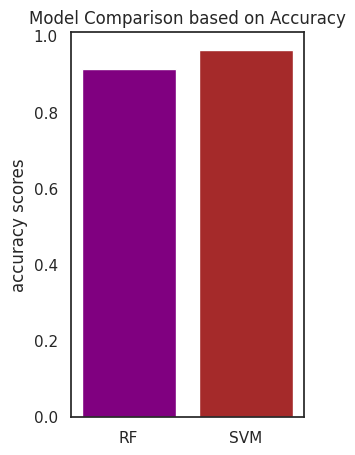

In [66]:
#------------>Finding the Best Algorithm<----------

print("\n------------>We decide from the Bar Graph that the best Model is SVM<------------")
plt.rcParams['figure.figsize'] = (3,5)
plt.bar(models, acc_scores, color=['purple','brown'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

------->EDA for Best 8 Features for SVM<-------


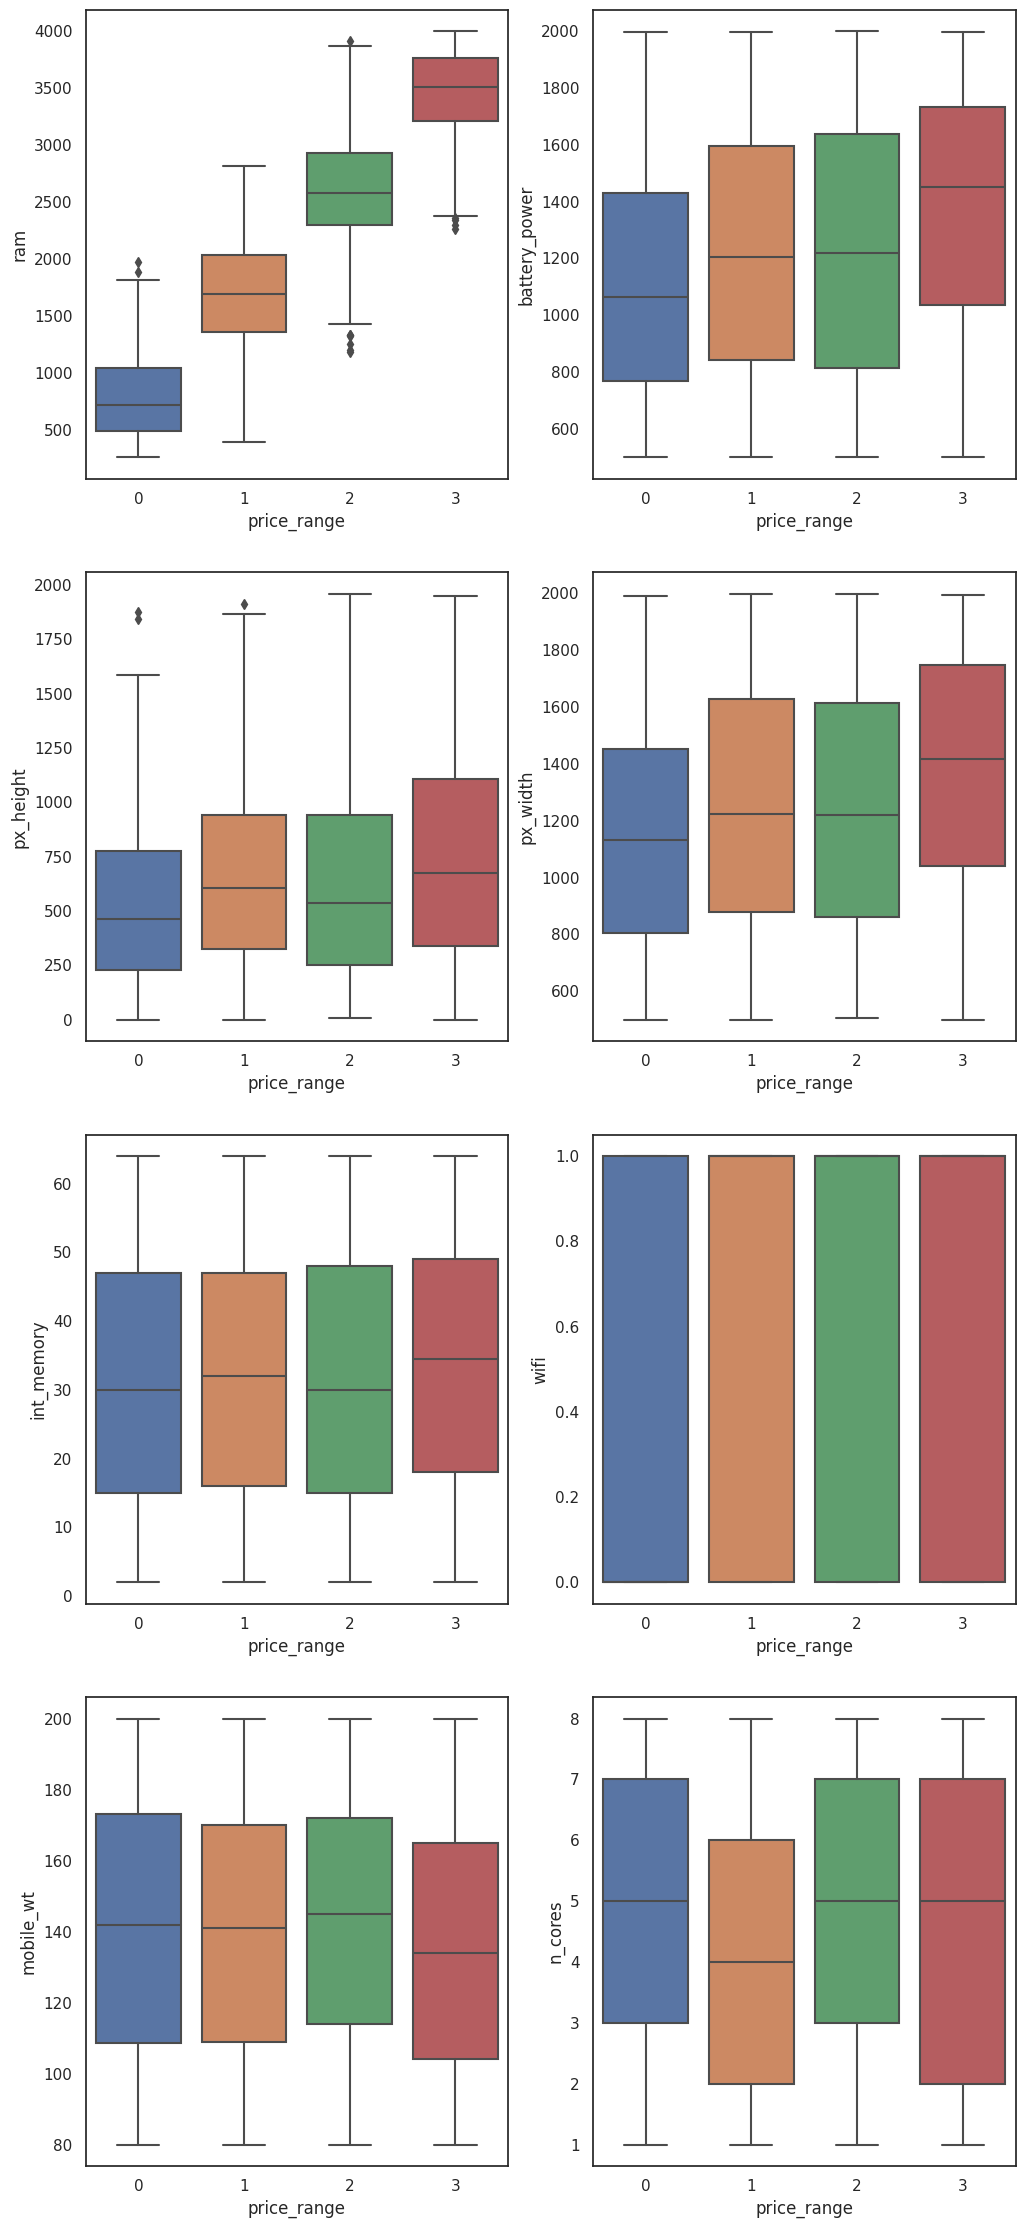

In [67]:
#EDA for the best 8 features that we saw on SVM
print("------->EDA for Best 8 Features for SVM<-------")
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.boxplot(x='price_range',y='ram',data=data,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=data,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_height',data=data,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_width',data=data,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=data,ax=ax[2,0]);
sns.boxplot(x='price_range',y='wifi',data=data,ax=ax[2,1]);
sns.boxplot(x='price_range',y='mobile_wt',data=data,ax=ax[3,0]);
sns.boxplot(x='price_range',y='n_cores',data=data,ax=ax[3,1]);

In [68]:
#------------>Using the Best Algorithm<-------------
# Remove ID column(extra)
test_data=test_data.drop('id',axis=1)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test = sc.fit_transform(test_data)

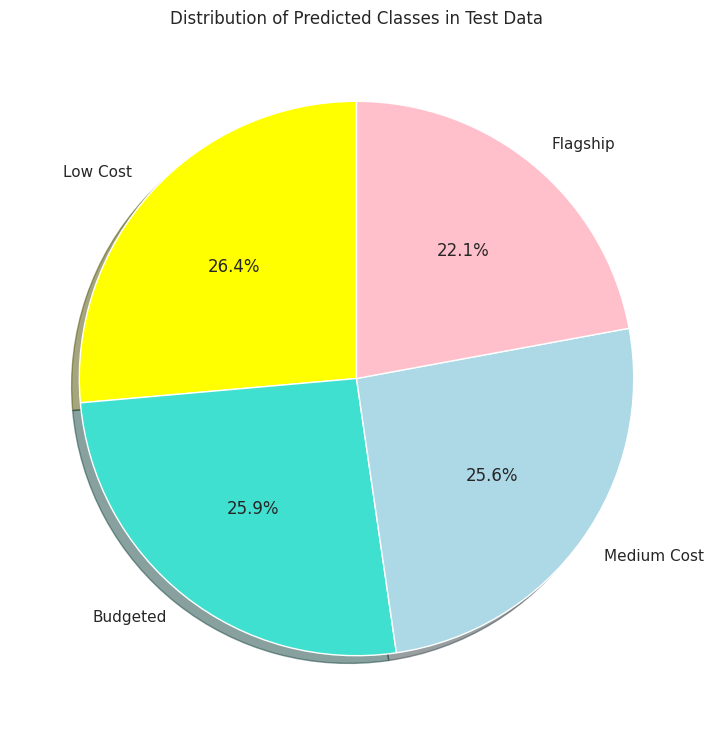

In [69]:
# Prediction
predicted_price_range = svm.predict(test)

test_data['price_range'] = predicted_price_range

labels = ["Low Cost", "Budgeted", "Medium Cost", "Flagship"]
labels = list(labels)
values = test_data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
plt.rcParams['figure.figsize'] = (12,9)
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Distribution of Predicted Classes in Test Data')
plt.show()

In [71]:
#------------>CLassification Report<------------

# Confusion Matrix
print("\n------------>Classification Report for SVM<------------")
confusion = confusion_matrix(y_valid, y_pred_svm)
# For class 0
TP_0 = confusion[0,0]
TN_0 = confusion[1,1]+confusion[2,2]+confusion[3,3]
FP_0 = confusion[1,0]+confusion[2,0]+confusion[3,0]
FN_0 = confusion[0,1]+confusion[0,2]+confusion[0,3]

precision_0 = TP_0 / ( TP_0 + FP_0)
recall_0 = TP_0 / ( TP_0 + FN_0)
specificity_0 = TN_0 / (TN_0 + FP_0)
accuracy_0 = (TP_0 + TN_0) / (TP_0 + TN_0 + FP_0 + FN_0)
fscore_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)

# For class 1
TP_1 = confusion[1,1]
TN_1 = confusion[0,0]+confusion[2,2]+confusion[3,3]
FP_1 = confusion[0,1]+confusion[2,1]+confusion[3,1]
FN_1 = confusion[1,0]+confusion[1,2]+confusion[1,3]

precision_1 = TP_1 / ( TP_1 + FP_1)
recall_1 = TP_1 / ( TP_1 + FN_1)
specificity_1 = TN_1 / (TN_1 + FP_1)
accuracy_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)
fscore_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)

# For class 2
TP_2 = confusion[2,2]
TN_2 = confusion[1,1]+confusion[0,0]+confusion[3,3]
FP_2 = confusion[1,2]+confusion[0,2]+confusion[3,2]
FN_2 = confusion[2,0]+confusion[2,1]+confusion[2,3]

precision_2 = TP_2 / ( TP_2 + FP_2)
recall_2 = TP_2 / ( TP_2 + FN_2)
specificity_2 = TN_2 / (TN_2 + FP_2)
accuracy_2 = (TP_2 + TN_2) / (TP_2 + TN_2 + FP_2 + FN_2)
fscore_2 = (2 * precision_2 * recall_2) / (precision_2 + recall_2)

# For class 3
TP_3 = confusion[3,3]
TN_3 = confusion[1,1]+confusion[2,2]+confusion[0,0]
FP_3 = confusion[0,3]+confusion[2,3]+confusion[1,3]
FN_3 = confusion[3,1]+confusion[3,2]+confusion[3,0]

precision_3 = TP_3 / ( TP_3 + FP_3)
recall_3 = TP_3 / ( TP_3 + FN_3)
specificity_3 = TN_3 / (TN_3 + FP_3)
accuracy_3 = (TP_3 + TN_3) / (TP_3 + TN_3 + FP_3 + FN_3)
fscore_3 = (2 * precision_3 * recall_3) / (precision_3 + recall_3)

print("-----------------------------------------------------------------")
print("\t " "  Class 0 \t Class 1 \t Class 2 \t Class 3")
print("-----------------------------------------------------------------")
print("Accuracy:" + "  " + str("%.4f" % accuracy_0) + " \t " + str("%.4f" % accuracy_1) +"\t"+" \t " + str("%.4f" % accuracy_2) +"\t"+ " \t " + str("%.4f" % accuracy_3) + "\n")
print("Precision:" + " " + str("%.4f" % precision_0) + " \t " + str("%.4f" % precision_1) +"\t"+" \t " + str("%.4f" % precision_2) +"\t"+ " \t " + str("%.4f" % precision_3) + "\n")
print("Recall:" + "    " + str("%.4f" % recall_0) + " \t " + str("%.4f" % recall_1) +"\t"+" \t " + str("%.4f" % recall_2) +"\t"+ " \t " + str("%.4f" % recall_3) + "\n")
print("Specificity:" +"" + str("%.4f" % specificity_0) + " \t " + str("%.4f" % specificity_1) +"\t"+" \t " + str("%.4f" % specificity_2) +"\t"+ " \t " + str("%.4f" % specificity_3) + "\n")
print("F-score:" + "   " + str("%.4f" % fscore_0) + " \t " + str("%.4f" % fscore_1) +"\t"+" \t " + str("%.4f" % fscore_2) +"\t"+ " \t " + str("%.4f" % fscore_3) )
print("-----------------------------------------------------------------")


------------>Classification Report for SVM<------------
-----------------------------------------------------------------
	   Class 0 	 Class 1 	 Class 2 	 Class 3
-----------------------------------------------------------------
Accuracy:  0.9821 	 0.9722	 	 0.9796	 	 0.9897

Precision: 0.9515 	 0.9684	 	 0.9510	 	 0.9800

Recall:    0.9800 	 0.9200	 	 0.9700	 	 0.9800

Specificity:0.9829 	 0.9899	 	 0.9829	 	 0.9931

F-score:   0.9655 	 0.9436	 	 0.9604	 	 0.9800
-----------------------------------------------------------------


In [72]:
#------------->Applying LDA<-------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train,y_train)
x_valid = lda.transform(x_valid)

#By runnning all the models we find the best accuracy for 2 Linear Discriminants is given by Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_valid)
#Calculate Accuracy
acc_nb = accuracy_score(y_valid, y_pred_nb)

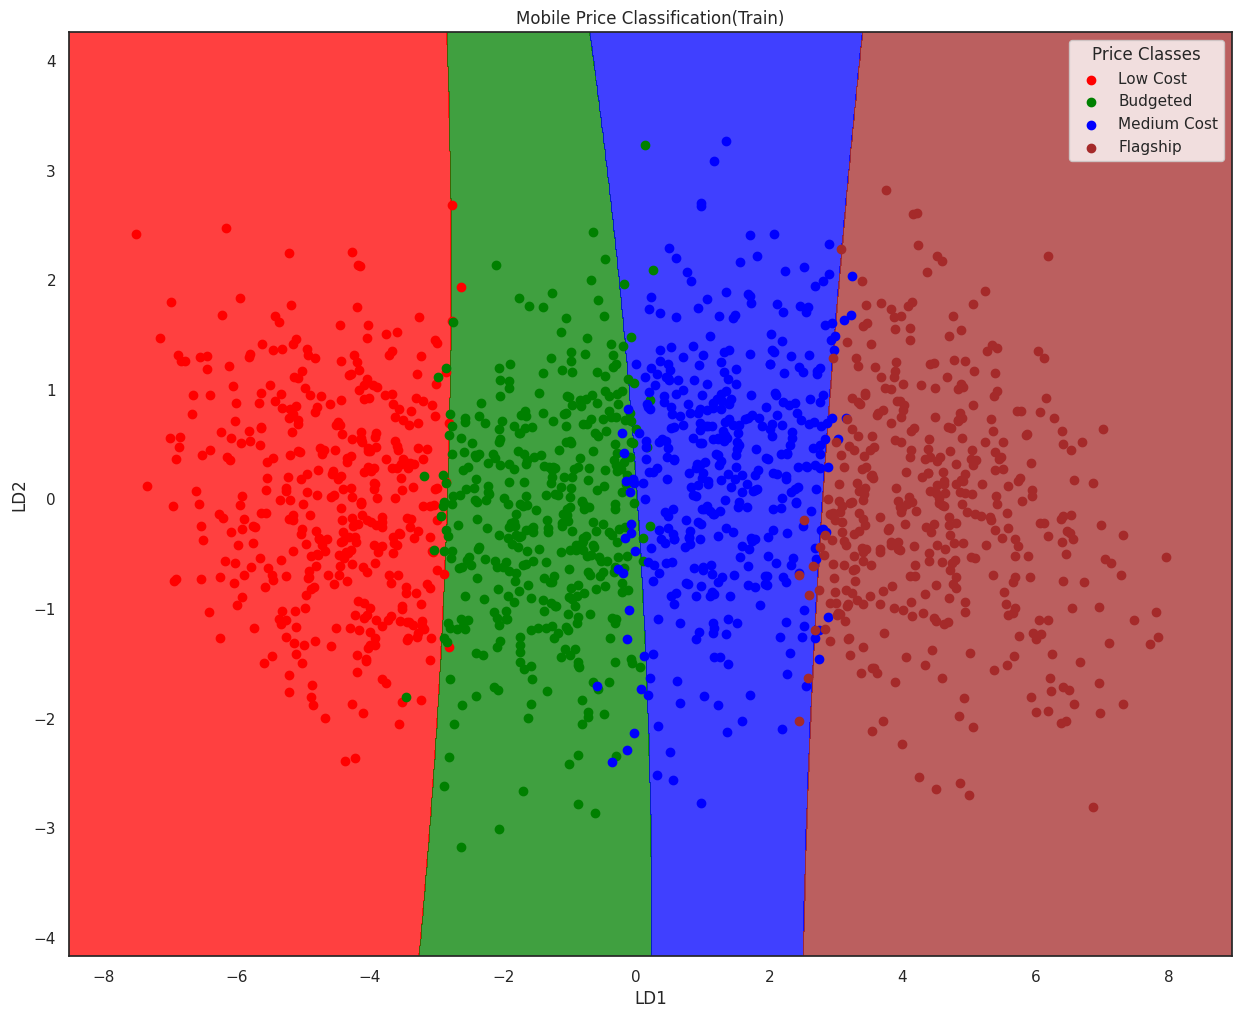

In [73]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
fig, ax = plt.subplots(figsize=(15,12))
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue','brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
classes = ['Low Cost', 'Budgeted', 'Medium Cost', 'Flagship']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue','brown'))(i), label = classes[j])
plt.title('Mobile Price Classification(Train)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title = "Price Classes")
plt.show()

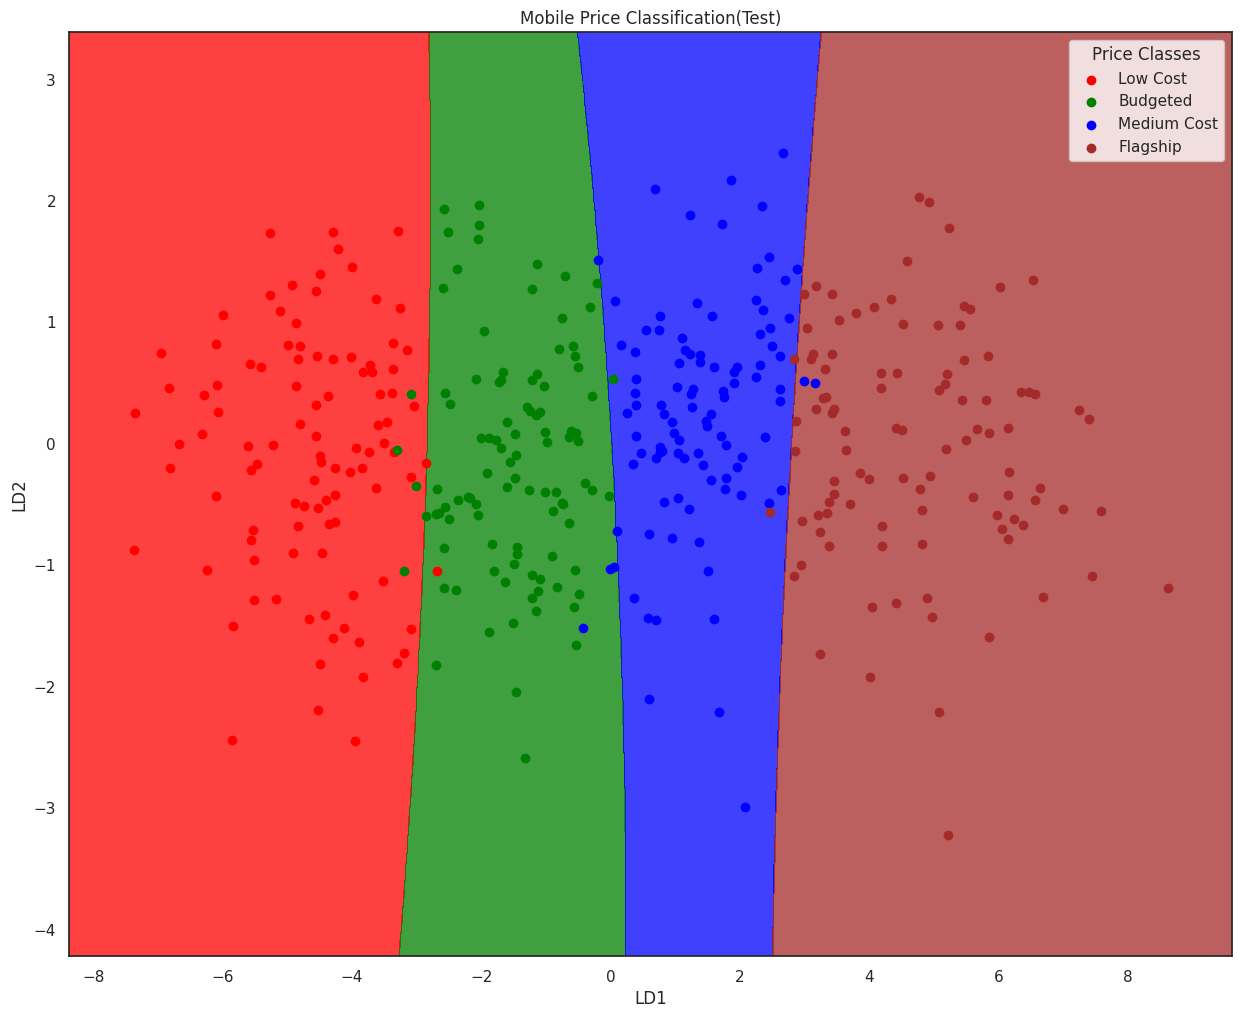

In [74]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
fig, ax = plt.subplots(figsize=(15,12))
X_set, y_set = x_valid, y_valid
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue','brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
classes = ['Low Cost', 'Budgeted', 'Medium Cost', 'Flagship']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue','brown'))(i), label = classes[j])
plt.title('Mobile Price Classification(Test)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title = "Price Classes")
plt.show()

# ANN

In [75]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

Iteration 1, loss = 2.10222648
Iteration 2, loss = 1.58612945
Iteration 3, loss = 1.25699148
Iteration 4, loss = 1.00172370
Iteration 5, loss = 0.76004298
Iteration 6, loss = 0.56755742
Iteration 7, loss = 0.45061569
Iteration 8, loss = 0.36996250
Iteration 9, loss = 0.30767647
Iteration 10, loss = 0.26020196
Iteration 11, loss = 0.22568147
Iteration 12, loss = 0.19957428
Iteration 13, loss = 0.18215161
Iteration 14, loss = 0.16815873
Iteration 15, loss = 0.15633638
Iteration 16, loss = 0.15005285
Iteration 17, loss = 0.14316337
Iteration 18, loss = 0.13723684
Iteration 19, loss = 0.13278091
Iteration 20, loss = 0.12913636
Iteration 21, loss = 0.12524915
Iteration 22, loss = 0.12339803
Iteration 23, loss = 0.12065113
Iteration 24, loss = 0.11791981
Iteration 25, loss = 0.11914093
Iteration 26, loss = 0.11581332
Iteration 27, loss = 0.11417465
Iteration 28, loss = 0.11136155
Iteration 29, loss = 0.11162588
Iteration 30, loss = 0.10897137
Iteration 31, loss = 0.10708765
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [77]:
# Make prediction on test dataset
ypred=clf.predict(x_valid)

# Calcuate accuracy
accuracy_score(x_valid,ypred)

ValueError: ignored